# Time Series Classification and Clustering Assignment

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>

In [8]:
data = pd.read_csv("../data/NFLX_data.csv")
# data = data[["date", "close"]]
data["date"] = pd.to_datetime(data["date"])

<IPython.core.display.Javascript object>

In [23]:
data["returns"] = data["close"].pct_change(1)
data["MA_5"] = data["close"].rolling(5).mean()
data["MA_10"] = data["close"].rolling(10).mean()
data["trend"] = "None"
data.loc[data["MA_5"] < data["MA_10"], "trend"] = "negative"
data.loc[data["MA_5"] > data["MA_10"], "trend"] = "positive"
data["change"] = data["trend"].eq(data["trend"].shift())

data["binary"] = 0
data.loc[(data["change"] == False) & (data["trend"] != None), "binary"] = 1
data.dropna(inplace=True)
data.tail()

,date,open,high,low,close,volume,Name,returns,MA_5,MA_10,trend,change,binary
1254,2018-02-01,266.41,271.950,263.380,265.07,9669011,NFLX,-0.019349,274.672,260.269,positive,True,0
1255,2018-02-02,263.00,270.620,262.710,267.43,9123610,NFLX,0.008903,273.238,264.966,positive,True,0
1256,2018-02-05,262.00,267.899,250.030,254.26,11896053,NFLX,-0.049247,267.172,267.634,negative,False,1
1257,2018-02-06,247.70,266.700,245.000,265.72,12595801,NFLX,0.045072,264.556,269.177,negative,True,0
1258,2018-02-07,266.58,272.450,264.325,264.56,8981548,NFLX,-0.004365,263.408,269.503,negative,True,0


<IPython.core.display.Javascript object>

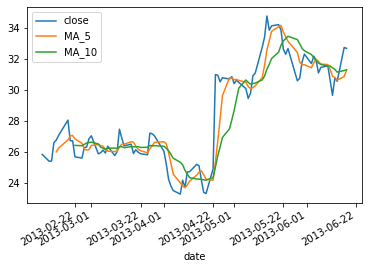

<IPython.core.display.Javascript object>

In [15]:
data.set_index("date").iloc[:90][["close", "MA_5", "MA_10"]].plot()

In [24]:
transformed = data[["date", "returns", "binary"]]
transformed

,date,returns,binary
9,2013-02-22,-0.038952,1
10,2013-02-25,-0.003005,0
11,2013-02-26,0.026599,1
12,2013-02-27,0.001251,0
13,2013-02-28,0.020398,0
...,...,...,...
1254,2018-02-01,-0.019349,0
1255,2018-02-02,0.008903,0
1256,2018-02-05,-0.049247,1
1257,2018-02-06,0.045072,0


<IPython.core.display.Javascript object>

In [30]:
history = 90
future = 0
shifts = [x + future for x in list(range(1, history + 1))]

for shift in shifts:
    transformed["t-" + str(shift)] = transformed["returns"].shift(shift)

transformed.dropna(inplace=True)
transformed.head()

,date,returns,binary,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-81,t-82,t-83,t-84,t-85,t-86,t-87,t-88,t-89,t-90
189,2013-11-07,-0.026131,0,-0.017189,0.011553,0.025314,0.021040,0.013642,-0.027987,0.042357,...,0.009692,0.002794,0.053613,0.001435,-0.014400,0.061270,0.035541,0.018968,-0.002484,-0.012575
190,2013-11-08,0.024598,0,-0.026131,-0.017189,0.011553,0.025314,0.021040,0.013642,-0.027987,...,0.028561,0.009692,0.002794,0.053613,0.001435,-0.014400,0.061270,0.035541,0.018968,-0.002484
191,2013-11-11,0.008988,0,0.024598,-0.026131,-0.017189,0.011553,0.025314,0.021040,0.013642,...,-0.005636,0.028561,0.009692,0.002794,0.053613,0.001435,-0.014400,0.061270,0.035541,0.018968
192,2013-11-12,-0.012369,0,0.008988,0.024598,-0.026131,-0.017189,0.011553,0.025314,0.021040,...,-0.006884,-0.005636,0.028561,0.009692,0.002794,0.053613,0.001435,-0.014400,0.061270,0.035541
193,2013-11-13,0.004656,0,-0.012369,0.008988,0.024598,-0.026131,-0.017189,0.011553,0.025314,...,-0.009887,-0.006884,-0.005636,0.028561,0.009692,0.002794,0.053613,0.001435,-0.014400,0.061270


<IPython.core.display.Javascript object>

In [36]:
X = transformed.drop(columns=["date", "returns", "binary"])
y = transformed["binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

<IPython.core.display.Javascript object>

In [37]:
y.value_counts()

0    961
1    109
Name: binary, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [39]:
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       191
           1       0.12      0.26      0.16        23

    accuracy                           0.71       214
   macro avg       0.51      0.51      0.49       214
weighted avg       0.81      0.71      0.75       214



<IPython.core.display.Javascript object>

In [41]:
(data["returns"] > 0).astype(int)

9       0
10      0
11      1
12      1
13      1
       ..
1254    0
1255    1
1256    0
1257    1
1258    0
Name: returns, Length: 1250, dtype: int32

<IPython.core.display.Javascript object>

In [42]:
def kmeans(df, clusters=2):
    model = KMeans(n_clusters=clusters, random_state=42)
    clusters = model.fit_predict(df)
    results = df.copy()
    results['Cluster'] = clusters
    
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    
    return results, summary


<IPython.core.display.Javascript object>

### Import the Walmart stock price data set (WMT_data.csv).

In [46]:
data = pd.read_csv("../data/WMT_data.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT


<IPython.core.display.Javascript object>

### Transform the data to be able to predict minor direction changes in the stock's price, given 180 days of history.

- Remember to calculate daily returns from the observed values (closing price).
- Make the critera for identifying a direction change when the observed values (closing price) cross the 5 day moving average.
- Create a binary column that defaults to 0 unless the criteria is met (then updates to 1).
- Shift the data set so that you have 180 days of history for each record.

In [47]:
data["returns"] = data["close"].pct_change(1)
data["MA_5"] = data["close"].rolling(5).mean()
# data["MA_10"] = data["close"].rolling(10).mean()

data["trend"] = "None"
data.loc[data["MA_5"] > data["returns"], "trend"] = "negative"
data.loc[data["MA_5"] < data["returns"], "trend"] = "positive"
data["change"] = data["trend"].eq(data["trend"].shift())
data.dropna(inplace=True)
data

,date,open,high,low,close,volume,Name,returns,MA_5,trend,change
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT,-0.007984,71.298,negative,False
5,2013-02-15,69.54,70.00,68.130,69.30,25687156,WMT,-0.021463,70.862,negative,True
6,2013-02-19,69.19,69.45,68.540,68.76,14683322,WMT,-0.007792,70.334,negative,True
7,2013-02-20,68.72,69.85,68.300,69.21,11973720,WMT,0.006545,69.896,negative,True
8,2013-02-21,70.00,71.47,69.720,70.26,20425983,WMT,0.015171,69.670,negative,True
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,105.96,106.56,105.180,105.52,6386836,WMT,-0.010131,107.558,negative,True
1255,2018-02-02,105.15,106.47,104.150,104.48,9253068,WMT,-0.009856,106.776,negative,True
1256,2018-02-05,103.40,104.61,97.090,100.09,12561594,WMT,-0.042018,104.884,negative,True
1257,2018-02-06,97.64,101.08,97.250,100.90,16413797,WMT,0.008093,103.518,negative,True


<IPython.core.display.Javascript object>

### Train a Logistic Regression classification model on the transformed data.

### Run a classification report and evaluate the performance of the classifier.

### Transform the data again to have 10 days of history for clustering.

### Train a K Means clustering model on the data. 

Try different values for K and see how the summary changes.

### Visualize the summary of the clustering results as a heatmap.